# Computer Vision

## Credentials

## Connect to Service

## Make prediction

{'status': 'Running'}
{'status': 'Succeeded', 'recognitionResult': {'lines': [{'boundingBox': [63, 498, 486, 508, 484, 565, 61, 555], 'text': '0 0 5 6 6 4 U', 'words': [{'boundingBox': [154, 505, 188, 507, 189, 559, 155, 558], 'text': '0'}, {'boundingBox': [200, 508, 238, 510, 239, 560, 201, 559], 'text': '0'}, {'boundingBox': [249, 510, 284, 511, 285, 561, 250, 560], 'text': '5'}, {'boundingBox': [295, 511, 333, 512, 334, 562, 296, 561], 'text': '6'}, {'boundingBox': [345, 512, 379, 512, 380, 563, 346, 562], 'text': '6'}, {'boundingBox': [390, 511, 429, 511, 430, 564, 392, 563], 'text': '4'}, {'boundingBox': [451, 510, 482, 509, 483, 564, 453, 564], 'text': 'U'}]}, {'boundingBox': [297, 600, 620, 613, 618, 660, 295, 647], 'text': 'CEM14 0122', 'words': [{'boundingBox': [300, 603, 486, 608, 485, 655, 300, 649], 'text': 'CEM14'}, {'boundingBox': [504, 609, 617, 616, 616, 660, 503, 655], 'text': '0122'}]}, {'boundingBox': [295, 668, 387, 671, 386, 696, 294, 693], 'text': 'T10037', 'words

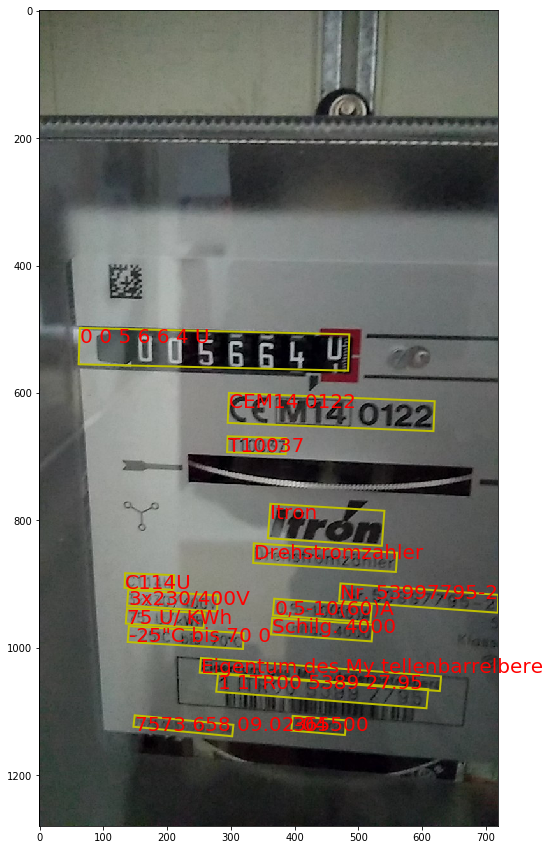

In [44]:
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

subscription_key = "076cf83a447c4411a125dc952562e788"
endpoint = "https://eastus.api.cognitive.microsoft.com/"

text_recognition_url = endpoint + "vision/v2.0/RecognizeText"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://storageaccmsbi.blob.core.windows.net/dropzone/Image_0.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}
params = {'mode' : 'Handwritten'}

response = requests.post(text_recognition_url, headers=headers, json=data, params=params)
response.raise_for_status()

# Extracting text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    print(analysis)
    time.sleep(1)
    if ("recognitionResult" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll = False

polygons = []
if ("recognitionResult" in analysis):
    lines = analysis["recognitionResult"]["lines"]
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["recognitionResult"]["lines"]]
print(polygons)

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top", color='r')

In [48]:
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO


def ComputerVisionPredict():

    subscription_key = "076cf83a447c4411a125dc952562e788"
    endpoint = "https://eastus.api.cognitive.microsoft.com/"

    text_recognition_url = endpoint + "vision/v2.0/RecognizeText"

    # Set image_url to the URL of an image that you want to analyze.
    image_url = "https://storageaccmsbi.blob.core.windows.net/dropzone/Image_0.jpg"

    headers = {'Ocp-Apim-Subscription-Key': subscription_key}
    data = {'url': image_url}
    params = {'mode' : 'Handwritten'}

    response = requests.post(text_recognition_url, headers=headers, json=data, params=params)
    response.raise_for_status()

    # Extracting text requires two API calls: One call to submit the
    # image for processing, the other to retrieve the text found in the image.

    # Holds the URI used to retrieve the recognized text.
    operation_url = response.headers["Operation-Location"]

    # The recognized text isn't immediately available, so poll to wait for completion.
    analysis = {}
    poll = True
    while (poll):
        response_final = requests.get(response.headers["Operation-Location"], headers=headers)
        analysis = response_final.json()
        print(analysis)
        time.sleep(1)
        if ("recognitionResult" in analysis):
            poll = False
        if ("status" in analysis and analysis['status'] == 'Failed'):
            poll = False

    polygons = []
    if ("recognitionResult" in analysis):
        lines = analysis["recognitionResult"]["lines"]
        # Extract the recognized text, with bounding boxes.
        polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]
    
    return analysis

polygons = ComputerVisionPredict()

print(polygons)

{'status': 'Running'}
{'status': 'Succeeded', 'recognitionResult': {'lines': [{'boundingBox': [63, 498, 486, 508, 484, 565, 61, 555], 'text': '0 0 5 6 6 4 U', 'words': [{'boundingBox': [154, 505, 188, 507, 189, 559, 155, 558], 'text': '0'}, {'boundingBox': [200, 508, 238, 510, 239, 560, 201, 559], 'text': '0'}, {'boundingBox': [249, 510, 284, 511, 285, 561, 250, 560], 'text': '5'}, {'boundingBox': [295, 511, 333, 512, 334, 562, 296, 561], 'text': '6'}, {'boundingBox': [345, 512, 379, 512, 380, 563, 346, 562], 'text': '6'}, {'boundingBox': [390, 511, 429, 511, 430, 564, 392, 563], 'text': '4'}, {'boundingBox': [451, 510, 482, 509, 483, 564, 453, 564], 'text': 'U'}]}, {'boundingBox': [297, 600, 620, 613, 618, 660, 295, 647], 'text': 'CEM14 0122', 'words': [{'boundingBox': [300, 603, 486, 608, 485, 655, 300, 649], 'text': 'CEM14'}, {'boundingBox': [504, 609, 617, 616, 616, 660, 503, 655], 'text': '0122'}]}, {'boundingBox': [295, 668, 387, 671, 386, 696, 294, 693], 'text': 'T10037', 'words

In [2]:
import json
import pprint

a = {\"status\": \"Succeeded\", \"recognitionResult\": {\"lines\": [{\"boundingBox\": [63, 498, 486, 508, 484, 565, 61, 555], \"text\": \"0 0 5 6 6 4 U\", \"words\": [{\"boundingBox\": [154, 505, 188, 507, 189, 559, 155, 558], \"text\": \"0\"}, {\"boundingBox\": [200, 508, 238, 510, 239, 560, 201, 559], \"text\": \"0\"}, {\"boundingBox\": [249, 510, 284, 511, 285, 561, 250, 560], \"text\": \"5\"}, {\"boundingBox\": [295, 511, 333, 512, 334, 562, 296, 561], \"text\": \"6\"}, {\"boundingBox\": [345, 512, 379, 512, 380, 563, 346, 562], \"text\": \"6\"}, {\"boundingBox\": [390, 511, 429, 511, 430, 564, 392, 563], \"text\": \"4\"}, {\"boundingBox\": [451, 510, 482, 509, 483, 564, 453, 564], \"text\": \"U\"}]}, {\"boundingBox\": [297, 600, 620, 613, 618, 660, 295, 647], \"text\": \"CEM14 0122\", \"words\": [{\"boundingBox\": [300, 603, 486, 608, 485, 655, 300, 649], \"text\": \"CEM14\"}, {\"boundingBox\": [504, 609, 617, 616, 616, 660, 503, 655], \"text\": \"0122\"}]}, {\"boundingBox\": [295, 668, 387, 671, 386, 696, 294, 693], \"text\": \"T10037\", \"words\": [{\"boundingBox\": [300, 669, 385, 672, 385, 697, 300, 694], \"text\": \"T10037\"}]}, {\"boundingBox\": [362, 774, 541, 785, 537, 840, 358, 828], \"text\": \"Itron\", \"words\": [{\"boundingBox\": [365, 775, 539, 786, 537, 839, 365, 830], \"text\": \"Itron\", \"confidence\": \"Low\"}]}, {\"boundingBox\": [336, 836, 561, 851, 559, 881, 335, 867], \"text\": \"Drehstromzahler\", \"words\": [{\"boundingBox\": [337, 837, 560, 852, 559, 881, 335, 867], \"text\": \"Drehstromzahler\", \"confidence\": \"Low\"}]}, {\"boundingBox\": [134, 883, 211, 886, 210, 909, 133, 906], \"text\": \"C114U\", \"words\": [{\"boundingBox\": [137, 884, 210, 886, 210, 909, 136, 907], \"text\": \"C114U\"}]}, {\"boundingBox\": [472, 899, 720, 917, 719, 945, 470, 927], \"text\": \"Nr. 53997795-2\", \"words\": [{\"boundingBox\": [481, 902, 519, 904, 518, 930, 480, 928], \"text\": \"Nr.\"}, {\"boundingBox\": [524, 905, 717, 918, 717, 945, 523, 930], \"text\": \"53997795-2\", \"confidence\": \"Low\"}]}, {\"boundingBox\": [139, 909, 280, 918, 278, 943, 137, 934], \"text\": \"3x230/400V\", \"words\": [{\"boundingBox\": [140, 910, 279, 919, 278, 942, 139, 935], \"text\": \"3x230/400V\", \"confidence\": \"Low\"}]}, {\"boundingBox\": [368, 923, 521, 934, 519, 960, 366, 949], \"text\": \"0,5-10(60)A\", \"words\": [{\"boundingBox\": [371, 925, 520, 934, 518, 961, 370, 950], \"text\": \"0,5-10(60)A\"}]}, {\"boundingBox\": [137, 938, 259, 946, 257, 969, 135, 962], \"text\": \"75 U/ KWh\", \"words\": [{\"boundingBox\": [143, 940, 169, 941, 167, 964, 141, 963], \"text\": \"75\"}, {\"boundingBox\": [182, 942, 210, 943, 208, 967, 181, 965], \"text\": \"U/\"}, {\"boundingBox\": [214, 944, 258, 947, 258, 970, 213, 967], \"text\": \"KWh\"}]}, {\"boundingBox\": [365, 953, 523, 964, 521, 990, 363, 979], \"text\": \"Schilg. 4000\", \"words\": [{\"boundingBox\": [369, 954, 457, 961, 455, 986, 368, 980], \"text\": \"Schilg.\", \"confidence\": \"Low\"}, {\"boundingBox\": [465, 961, 522, 965, 520, 989, 464, 986], \"text\": \"4000\"}]}, {\"boundingBox\": [140, 966, 320, 977, 319, 1002, 138, 991], \"text\": \"-25\\\"C bis 70 0\", \"words\": [{\"boundingBox\": [143, 969, 206, 972, 206, 995, 142, 990], \"text\": \"-25\\\"C\", \"confidence\": \"Low\"}, {\"boundingBox\": [222, 972, 258, 974, 257, 998, 221, 996], \"text\": \"bis\"}, {\"boundingBox\": [272, 975, 297, 976, 296, 1001, 271, 999], \"text\": \"70\"}, {\"boundingBox\": [305, 977, 319, 978, 318, 1002, 304, 1001], \"text\": \"0\", \"confidence\": \"Low\"}]}, {\"boundingBox\": [253, 1016, 630, 1045, 628, 1068, 251, 1039], \"text\": \"Eigentum des My tellenbarrelbere\", \"words\": [{\"boundingBox\": [256, 1018, 344, 1024, 343, 1046, 254, 1040], \"text\": \"Eigentum\", \"confidence\": \"Low\"}, {\"boundingBox\": [361, 1025, 399, 1028, 397, 1050, 359, 1047], \"text\": \"des\"}, {\"boundingBox\": [405, 1028, 437, 1031, 436, 1053, 403, 1050], \"text\": \"My\", \"confidence\": \"Low\"}, {\"boundingBox\": [468, 1033, 629, 1046, 627, 1069, 467, 1055], \"text\": \"tellenbarrelbere\", \"confidence\": \"Low\"}]}, {\"boundingBox\": [280, 1040, 610, 1065, 607, 1095, 277, 1069], \"text\": \"1 1TR00 5389 27.95\", \"words\": [{\"boundingBox\": [286, 1042, 304, 1043, 302, 1071, 284, 1070], \"text\": \"1\"}, {\"boundingBox\": [311, 1043, 405, 1050, 403, 1077, 309, 1071], \"text\": \"1TR00\", \"confidence\": \"Low\"}, {\"boundingBox\": [421, 1051, 505, 1058, 503, 1085, 419, 1079], \"text\": \"5389\", \"confidence\": \"Low\"}, {\"boundingBox\": [522, 1059, 608, 1066, 605, 1095, 519, 1087], \"text\": \"27.95\", \"confidence\": \"Low\"}]}, {\"boundingBox\": [149, 1106, 304, 1121, 302, 1139, 147, 1124], \"text\": \"7573 658 09.02-04\", \"words\": [{\"boundingBox\": [151, 1107, 189, 1111, 188, 1129, 149, 1125], \"text\": \"7573\", \"confidence\": \"Low\"}, {\"boundingBox\": [193, 1111, 223, 1114, 221, 1132, 191, 1129], \"text\": \"658\", \"confidence\": \"Low\"}, {\"boundingBox\": [226, 1114, 304, 1121, 302, 1139, 225, 1132], \"text\": \"09.02-04\", \"confidence\": \"Low\"}]}, {\"boundingBox\": [397, 1107, 481, 1114, 479, 1137, 395, 1130], \"text\": \"365500\", \"words\": [{\"boundingBox\": [399, 1108, 481, 1115, 479, 1137, 398, 1130], \"text\": \"365500\", \"confidence\": \"Low\"}]}]}}

a_json = json.load(a)
pritn(a_json)

SyntaxError: unexpected character after line continuation character (<ipython-input-2-6e4fc3c27aec>, line 4)

In [1]:
@body('Parse_JSON_2')?['properties']?['probability']




SyntaxError: invalid syntax (<ipython-input-1-74d16b4700e8>, line 1)